In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

def remove_spike(files_pattern='*.his', window=2, threshold=0.1, abnormal_max=5, abnormal_min=0):
    files = glob.glob(files_pattern)
    for file in files:
        fig, ax = plt.subplots(figsize=(16, 6))
        
        # Read data
        dat=pd.read_csv(file,header=None)
        dat=dat.rename(columns={0:"Date",1:"Hs"})
        dat["Date"] = pd.to_datetime(dat["Date"])
        
        # Remove abnormal values
        dat = dat[(dat["Hs"] >= abnormal_min) & (dat["Hs"] <= abnormal_max)]
        
        # Plot raw data
        ax.plot(dat["Date"], dat["Hs"], label="Raw Data")
        
        # Compute rolling mean and filter data
        dat['rolling_mean'] = dat["Hs"].rolling(window=window, center=True).mean()
        dat['diff'] = np.abs(dat["Hs"] - dat['rolling_mean'])
        filtered_dat = dat[dat['diff'] <= threshold]
        
        # Plot filtered data
        ax.plot(filtered_dat["Date"], filtered_dat["Hs"], label="Filtered Data")
        
        ax.set_xlabel("Date")
        ax.set_ylabel("Hs")
        ax.legend()
        plt.show()

# Example usage


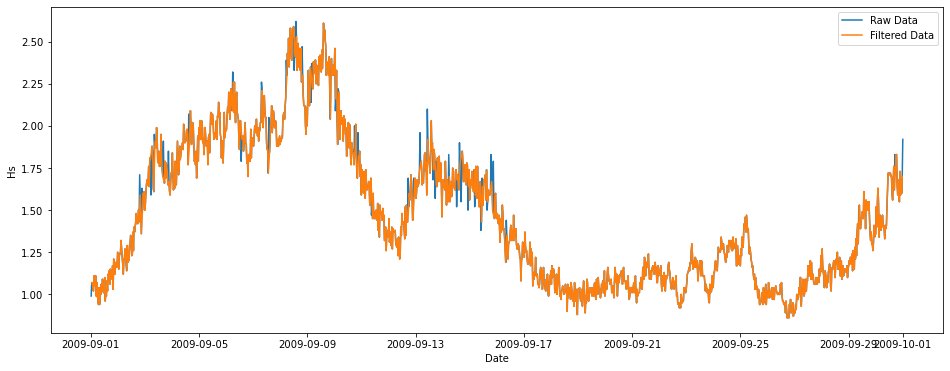

In [3]:
remove_spike(window=2, threshold=0.1, abnormal_max=5, abnormal_min=0)
